# Breast Cancer Classification — Model Comparison

This project explores multiple machine learning models for classifying breast cancer tumors
as malignant or benign using the Wisconsin Breast Cancer dataset.

Models are evaluated using:
- Accuracy
- Confusion Matrix
- Precision, Recall, F1-score
- ROC–AUC
- Decision threshold analysis

## 1. Dataset Loading and Exploration

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()

X = data.data
Y = data.target

print("X shape: ", X.shape)
print("Y shape: ", Y.shape)


X shape:  (569, 30)
Y shape:  (569,)


In [3]:
df = pd.DataFrame(X, columns = data.feature_names)
df["target"] = Y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 2. Train–Test Split


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, 
    Y, 
    test_size=0.2, 
    random_state=42,
    stratify=Y
    )

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_train shape: ", Y_train.shape)
print("Y_test shape: ", Y_test.shape)


X_train shape:  (455, 30)
X_test shape:  (114, 30)
Y_train shape:  (455,)
Y_test shape:  (114,)


## 3. Baseline Model: Logistic Regression


In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs'
)

model.fit(X_train, Y_train)

c:\Users\Ataberk\Documents\ml\envs\ml-env\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [8]:
from sklearn.metrics import accuracy_score

Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9649122807017544


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [10]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(
            max_iter=1000,
            solver='lbfgs',
            random_state=42
            )
        )
    ])

pipeline.fit(X_train, Y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('logreg', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not w

Feature scaling is applied using `StandardScaler` because Logistic Regression
is sensitive to feature magnitudes. A pipeline is used to prevent data leakage
and ensure consistent preprocessing during evaluation.


In [11]:
accuracy = pipeline.score(X_test, Y_test)
print(f"Pipeline test accuracy: {accuracy:.4f}")

Pipeline test accuracy: 0.9825


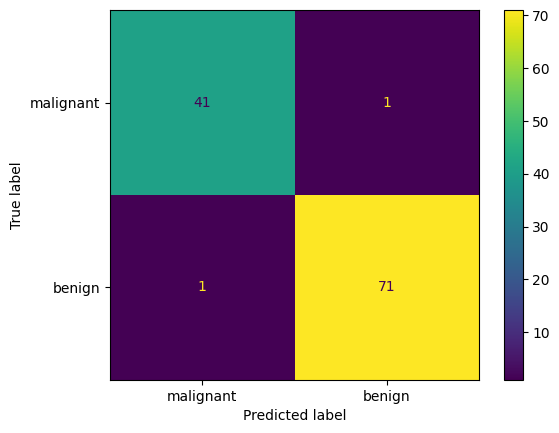

In [12]:
Y_pred_pipeline = pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred_pipeline)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)

disp.plot()
plt.show()

In [13]:
from sklearn.metrics import classification_report

print(classification_report(
    Y_test, 
    Y_pred_pipeline, 
    target_names=data.target_names
    )
)

              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## 4. ROC–AUC and Decision Threshold Analysis


In [14]:
Y_prob = pipeline.predict_proba(X_test)[:, 1] #benign class probabilities

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(Y_test, Y_prob) #fpr: false positive rate, tpr: true positive rate
auc_score = roc_auc_score(Y_test, Y_prob)

print(f"AUC Score: {auc_score:.4f}")


AUC Score: 0.9954


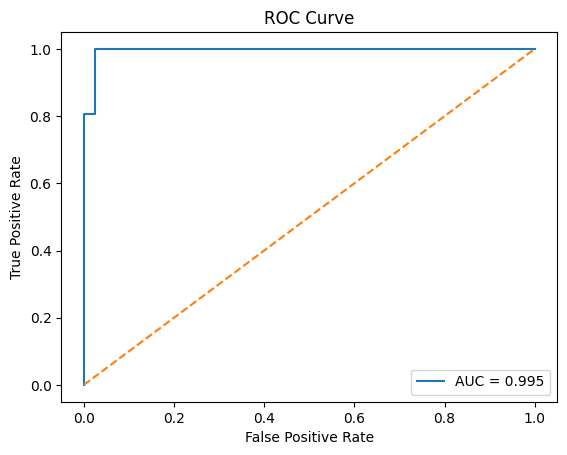

In [16]:
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

The ROC curve shows strong separability between classes, with an AUC close to 1,
indicating that the model ranks benign and malignant samples effectively
across a wide range of thresholds.


In [17]:
custom_threshold = 0.3
Y_custom_pred = (Y_prob >= custom_threshold).astype(int)


Lowering the decision threshold increases recall at the cost of precision.
In medical screening tasks, false negatives (missed cancer cases) are more
dangerous than false positives, so a lower threshold may be preferable.


In [18]:
print("Default threshold (0.5):")
print(confusion_matrix(Y_test, Y_pred_pipeline))

print("\nLowered threshold (0.3):")
print(confusion_matrix(Y_test, Y_custom_pred))

Default threshold (0.5):
[[41  1]
 [ 1 71]]

Lowered threshold (0.3):
[[40  2]
 [ 0 72]]


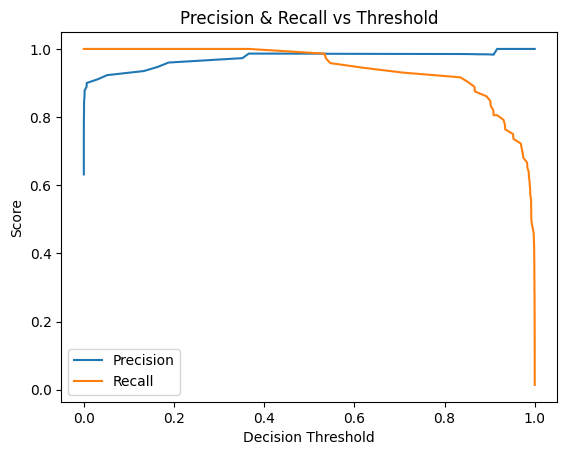

In [19]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds_pr = precision_recall_curve(Y_test, Y_prob)


plt.figure()
plt.plot(thresholds_pr, precisions[:-1], label="Precision")
plt.plot(thresholds_pr, recalls[:-1], label="Recall")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall vs Threshold")
plt.legend()
plt.show()

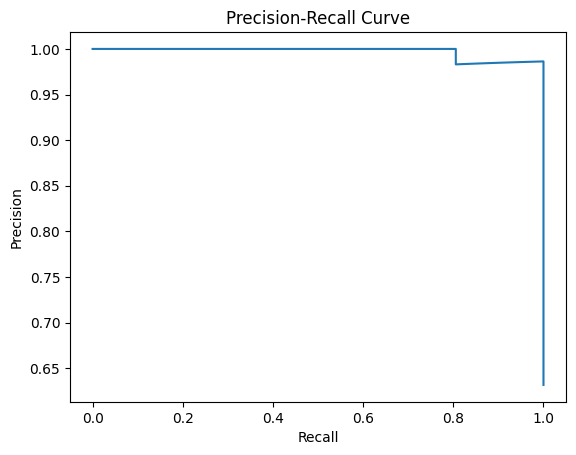

In [20]:
plt.figure()
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

The Precision–Recall curve highlights the trade-off between capturing most
positive cases and minimizing false alarms, which is especially relevant
for imbalanced or high-risk domains.


In [21]:
target_recall = 0.98
idx = np.where(recalls>=target_recall)[0][-1]
best_threshold = thresholds_pr[idx]

print(f"Chosen threshold: {best_threshold: .3f}")


Chosen threshold:  0.534


In [22]:
Y_custom_pred = (Y_prob >= best_threshold).astype(int)
print(confusion_matrix(Y_test, Y_custom_pred))

[[41  1]
 [ 1 71]]


## 5. Model Comparison

In [23]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = None
    
    accuracy = accuracy_score(y_test, y_pred)
    
    return {
        "Model": name,
        "Accuracy": accuracy,
        "ROC_AUC": auc
    }


In [24]:
#SVM
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(
        kernel='rbf',
        probability=True,
        random_state=42)
    )
])

svm_pipeline.fit(X_train, Y_train)

evaluate_model(
    "Support Vector Machine",
    svm_pipeline,
    X_test,
    Y_test
)

{'Model': 'Support Vector Machine',
 'Accuracy': 0.9824561403508771,
 'ROC_AUC': 0.9950396825396826}

In [25]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, Y_train)

evaluate_model(
    "Random Forest",
    rf_model,
    X_test,
    Y_test
)

{'Model': 'Random Forest',
 'Accuracy': 0.956140350877193,
 'ROC_AUC': 0.9937169312169312}

## 6. Model Comparison Summary

| Model | Accuracy | ROC–AUC | Notes |
|------|---------|---------|------|
| Logistic Regression | ~0.96 | ~0.99 | Strong baseline, interpretable |
| SVM | ~0.98 | ~0.99 | Good margin-based classifier |
| Random Forest | ~0.96 | ~0.99 | Non-linear, ensemble-based |

While more complex models may achieve similar or slightly higher performance,
Logistic Regression offers interpretability, which is valuable in medical contexts.
